# Лабораторная работа №1. Синтез и фильтрация шумоподобных сигналов. М-последовательности. Коды Уолша-Адамара 

[1. Теоретические сведения](#ch_1)  
[1.1 Основные термины и определения](#ch_1_1)  
[1.2 Автомат генерации M-последовательностей](#ch_1_2)  
[1.3 Основные свойства М-последовательностей](#ch_1_3)  
[1.4 Согласованный фильтр](#ch_1_4)  
[1.5 Ортогональные последовательности. Коды Уолша-Адамара](#ch_1_5)  
[1.6 Автомат генерации кодов Уолша-Адамара](#ch_1_6)  
[2. Основное задание](#ch_2)  
[2.1 Общие указания к выполнению лабораторной работы](#ch_2_1)  
[2.2 Синтез и фильтрация М-последовательностей](#ch_2_2)  
[2.3 Синтез и фильтрация кодов Уолша-Адамара](#ch_2_3)  
[2.4 Варианты заданий](#ch_2_4)  
[3. Дополнительные задания](#ch_3)  
[4. Контрольные вопросы](#ch_4)  

## 1. Теоретические сведения  <a id="ch_1"></a>
### 1.1 Основные термины и определения  <a id="ch_1_1"></a>
***База сигнала*** — это произведение активной ширины спектра сигнала F на его длительность T.  
$$
B=FT
$$
***Шумоподобными сигналами (ШПС)*** называют такие сигналы, для которых база много больше 1 ($B>>1$). Такие сигналы иначе называют «широкополосными» или «сложными». ШПС применяются в так называемых широкополосных системах связи.  
***Псевдослучайная последовательность (ПСП)*** — это последовательность чисел, которая была вычислена по некоторому определенному арифметическому правилу, но имеет все свойства случайной последовательности чисел.  
***Корреляция*** — статистическая взаимосвязь двух или более случайных величин.  
***Корреляционная функция (КФ)*** сигнала — функция времени, которая задает корреляцию (взаимосвязь) между сигналами, представленными в виде случайных последовательностей (или ПСП).  
***Автокорреляционная функция (АКФ)*** — КФ, которая выражает взаимосвязь между сигналом и его копией, сдвинутой по времени (опорной функцией).  
***Взаимнокорреляционная функция (ВКФ)*** — КФ, которая выражает взаимосвязь между двумя разными сигналами, представленными в виде случайных последовательностей (или ПСП).  
***М-последовательность*** — это ПСП, генерируемая при помощи сдвигового регистра с линейной обратной связью и имеющая максимальный период.  

### 1.2 Автомат генерации M-последовательностей  <a id="ch_1_2"></a>
Как уже было сказано, М-последовательность можно получить при помощи сдвигового регистра с линейной обратной связью (LFSR - linear-feedback shift register) [[1][s1]]. Обобщенная схема LFSR представлена на рисунке 1.  
  
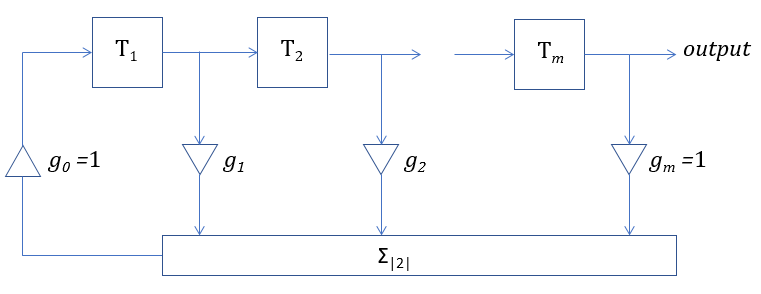  
*Рисунок 1 - Схема сдвигового регистра с обратной связью (реализация Фибоначчи [[2][s2],[3][s3]])*  

Полиномиальная интерпретация данной схемы состоит в том, что отводы (taps) от триггеров регистра обратной связи представляются в виде коэффициентов многочлена  
$$
G(X) = g_{0}+g_{1}X+...+g_{m-1}X^{m-1}+g_{m}X^{m},
$$
который имеет степень длины сдвигового регистра. Коэффициенты $g_{i}$ принимают значения 0 или 1, при этом, старший ($g_{m}$) и младший ($g_{0}$) коэффициенты всегда равны 1. Для того, чтобы последовательность, сформированная при помощи данного многочлена, являлась последовательностью максимальной длины, необходимо и достаточно, чтобы многочлен являлся ***неприводимым***.  
Массив коэффициентов многочлена $G(X)$ мы будем называть ***характеристическим многочленом*** М-последовательности, а массив значений триггеров сдвигового регистра - ***фазой*** М-последовательности.  
При инициализации фазы, первый (младший) разряд сдвигового должен быть равен 1. Остальные разряды могут быть заполнены любыми значениями (0 или 1).  

### 1.3 Основные свойства М-последовательностей:  <a id="ch_1_3"></a>
- М-последовательности являются периодическими с периодом $N=2^{m}-1$, где $m$ - размер сдвигового регистра;
- количество символов, принимающих значение 1, в рамках одного периода М-последовательности на 1 больше, чем количество нулей (свойство ***сбалансированности***);
- сумма по модулю 2 М-последовательности с её произвольным циклическим сдвигом также является М-последовательностью;
- АКФ любой М-последовательности в периодическом режиме имеет постоянный уровень боковых лепестков, равный $-1/N$ (является *дельта-функцией Кронекера* [[4][s4]]);
- АКФ усеченной М-последовательности (непериодический режим) имеет величину боковых лепестков, стремящуюся к $-1/\sqrt{N}$. 

### 1.4 Согласованный фильтр  <a id="ch_1_4"></a>
***Согласованный фильтр*** - это линейный оптимальный фильтр, построенный исходя из известных спектральных характеристик полезного сигнала и шума [[5][s5]].  
Для фильтрации сигналов, сформированных при помощи М-последовательностей используется согласованный фильтр, реализующий КФ двух ПСП, одна из которых является *сигналом*, а вторая - *опорной функцией*. Аналитически согласованный фильтр можно описать формулой:  $$(f \otimes g)_{i}=\sum_{i} f_{j}g_{i+j},$$  
где $i$ - сдвиг между последовательностями друг относительно друга, $f_{i}$ - ПСП сигнала, $g_{j}$ - ПСП опорной функции.  

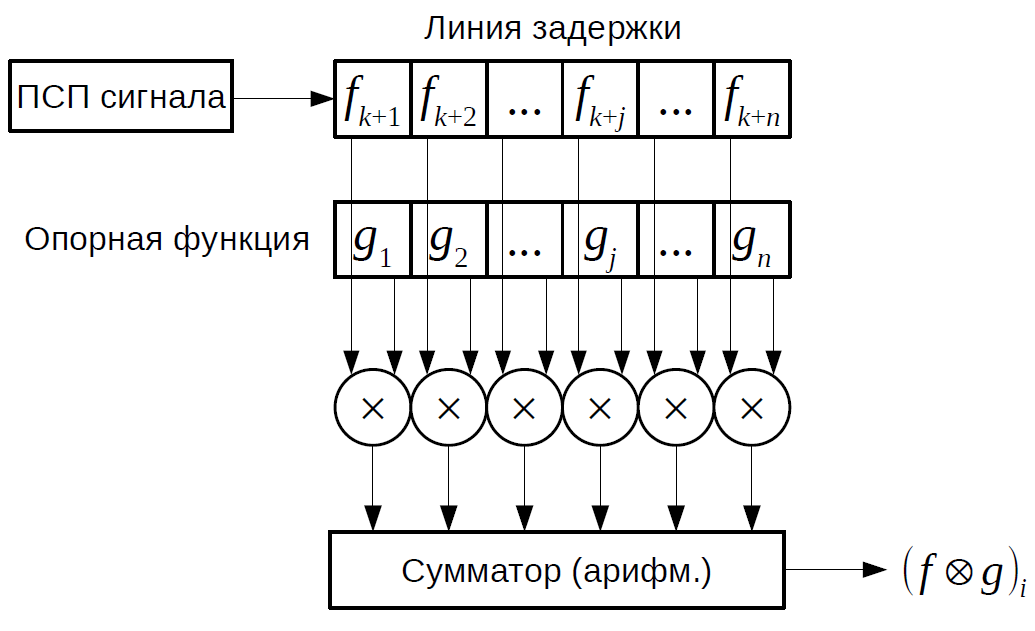  
*Рисунок 2 - Схема цифрового автомата, реализующего согласованный фильтр для двух ПСП*  

### 1.5 Ортогональные последовательности. Коды Уолша-Адамара  <a id="ch_1_5"></a>

***Ортогональными последовательностями (кодами)*** называются такие ПСП, КФ для которых равна 0 при отсутствии временного сдвига [[6][s6]].  
Одной из наиболее распространенных ортогональных систем является матрица Адамара, которая определяется по рекурентному правилу:  
$$
W_{2N}=\begin{bmatrix}W_{N}&W_{N}\\W_{N}&-W_{N}\end{bmatrix},
$$
где $W_{N}$ - матрица Адамара порядка $N$. Полагают, что $W_{1} = 1$. Например, матрица $W_{8}$, построенная по данному правилу, имеет следующий вид:  
$$
W_{8}=\begin{bmatrix}1&1&1&1&1&1&1&1\\1&-1&1&-1&1&-1&1&-1\\1&1&-1&-1&1&1&-1&-1\\1&-1&-1&1&1&-1&-1&1\\1&1&1&1&-1&-1&-1&-1\\1&-1&1&-1&-1&1&-1&1\\1&1&-1&-1&-1&-1&1&1\\1&-1&-1&1&-1&1&1&-1\end{bmatrix}.
$$
Код Уолша-Адамара - это строка (или столбец) матрицы Адамара. Номера строк (столбцов) являются исходными данными, подлежащими кодированию соответствующими последовательностями. Разрядность этих данных равна $log2(n)-1$, где $n$ - это размер строки (или длина кода Уолша-Адамара).  

Второй способ получить код Уолша-Адамара - воспользоваться схемой, представленной на рисунке 3.  

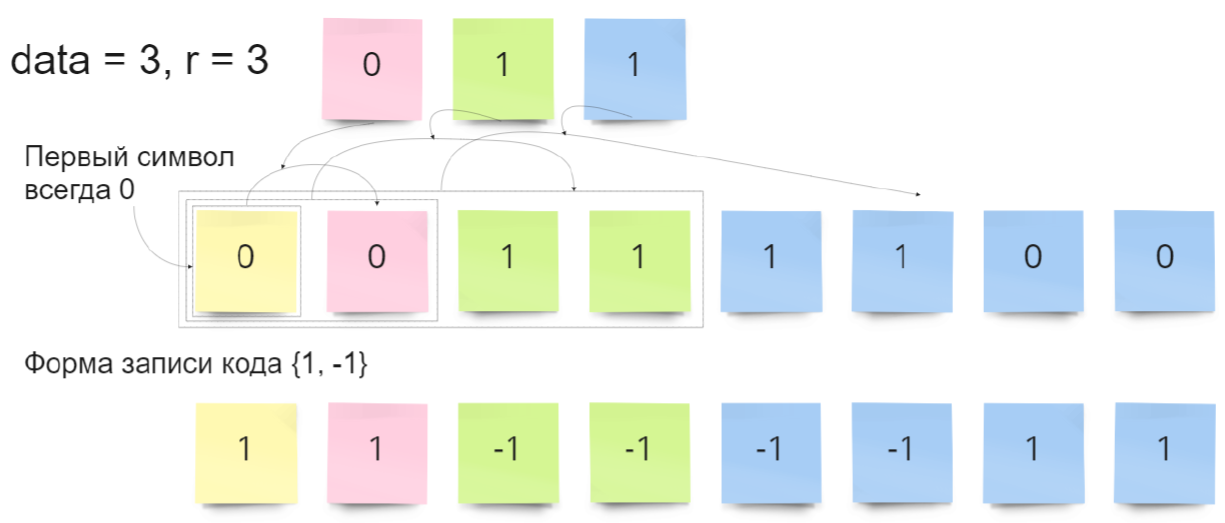  
*Рисунок 3 - Принцип формирования кодов Уолша-Адамара*  

Чтобы установить соответствие между двумя способами формирования кодов Уолша-Адамара, необходимо данные, кодируемые вторым способом, представить в виде *двоично-инверсной последовательности*. То есть для примера из рисунка 3:  
data = 3, в двоичном представлении это "011", в двоично-инверсном представлении - "110", что соответствует номеру 6 матрицы Адамара (нумерация строк или столбцов начинается с 0).  

### 1.6 Автомат генерации кодов Уолша-Адамара  <a id="ch_1_6"></a>
На рисунке 4 представлен автомат генерации кодов Уолша-Адамара для исходных данных, разрядностью $r = 3$. В общем случае, для реализации данного цифрового автомата потребуется сдвиговый регистр размером в $2^{r}-1$ триггеров и мультиплексор на $r$ входов в 1 выход. Входы мультиплексора соединяются с выходами триггеров, номера которых соответствуют степеням 2.   
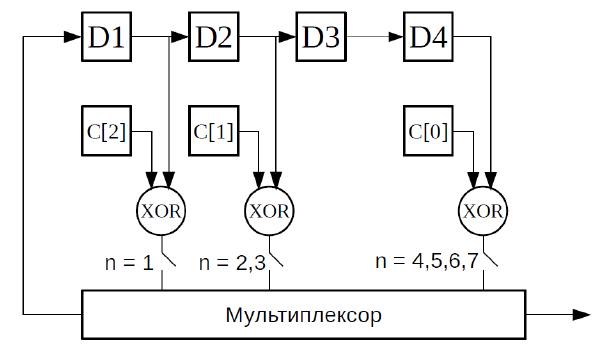  
*Рисунок 4 - Пример цифрового автомата формирования кодов Уолша-Адамара*  

Здесь $C[2:0]$ - трехразрядное число, которое необходимо закодировать. Ниже приведен пошаговый алгоритм работы автомата для примера из рисунка 3.  
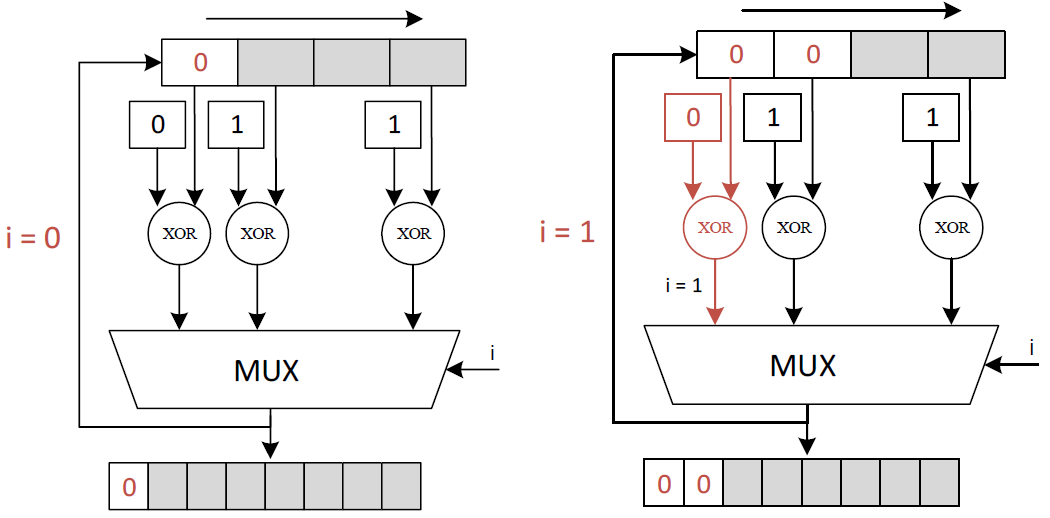  
*Рисунок 5(а) - Первый и второй шаги работы автомата генерации кода Уолша-Адамара*  

На первом шаге (i = 0) заполняем первый триггер значением 0. Это же значение является первым для итогового кода Уолша-Адамара.  
На втором шаге (i = 1) начинает работать поток, соответствующий старшему разряду кодируемого числа.  

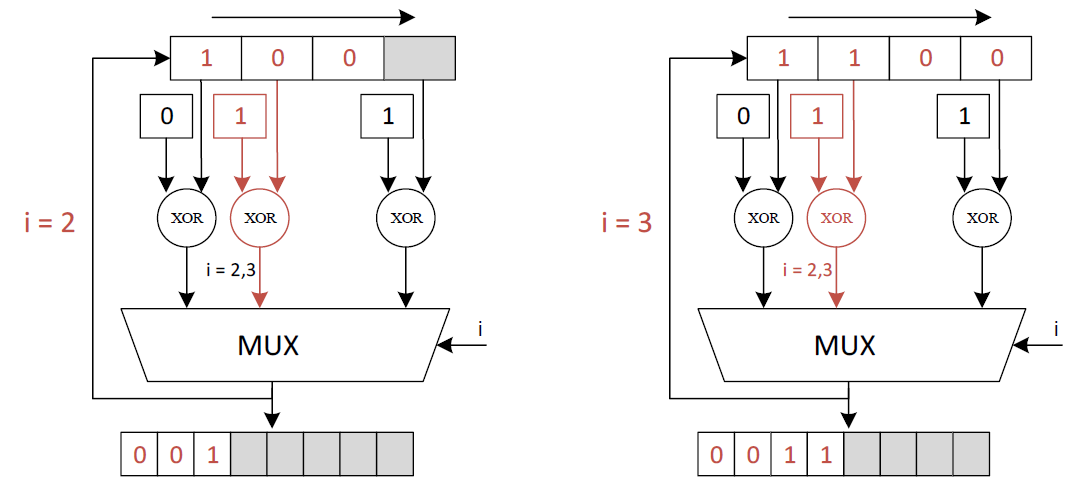  
*Рисунок 5(б) - Третий и четвертый шаги работы автомата генерации кода Уолша-Адамара*  

На третьем и четвертом шагах (i = 2,3) работает поток, соответствующий следующему по старшинству разряду кодируемого числа.  

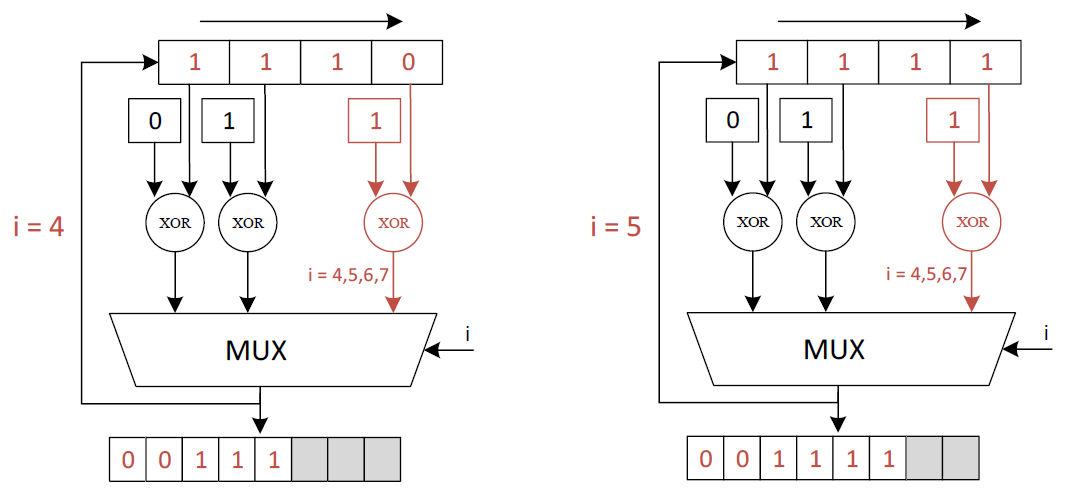  
*Рисунок 5(в) - Пятый и шестой шаги работы автомата генерации кода Уолша-Адамара*  

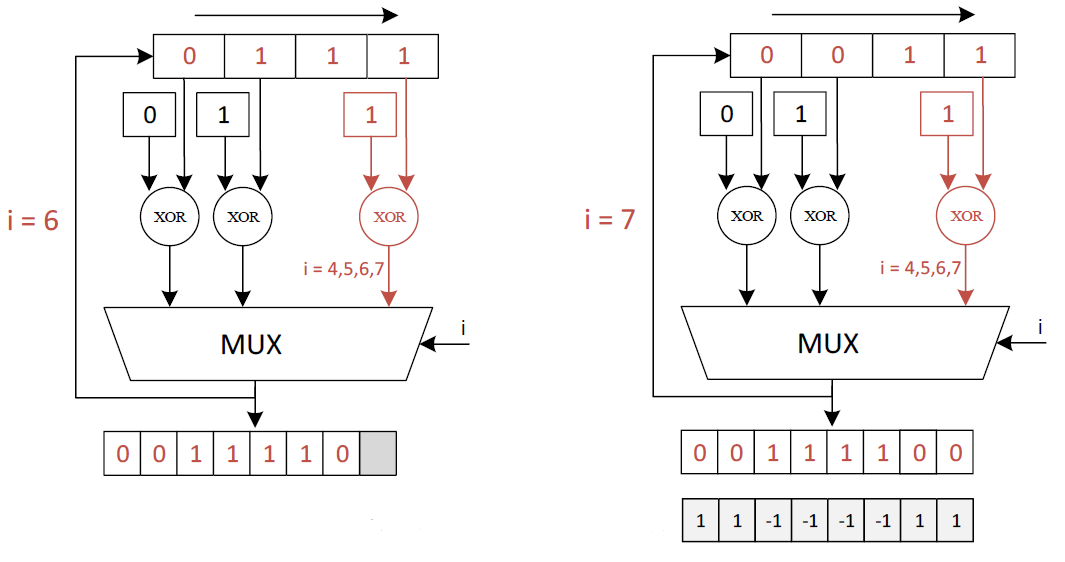  
*Рисунок 5(г) - Седьмой и восьмой шаги работы автомата генерации кода Уолша-Адамара*  

На пятом, шестом, седьмом и восьмом шагах (i = 4,5,6,7) работает поток, соответствующий младшему разряду кодируемого числа. В результате, при переходе к области значений $[-1, 1]$, получаем искомый код Уолша-Адамара. 

### 1.7 Быстрое преобразование Уолша-Адамара  <a id="ch_1_7"></a>

Быстрое преобразование Уолша-Адамара (*БПУА, FWHT - Fast Walsh-Hadamard Transform*) является частным случаем быстрого преобразрования Фурье [[7][s7]] (БПФ, FFT - Fast Fourier Transform), речь о котором пойдет в следующей лабораторной работе. Оба используют структуру "бабочки", чтобы определить коэффициенты преобразования (рисунок 6).  

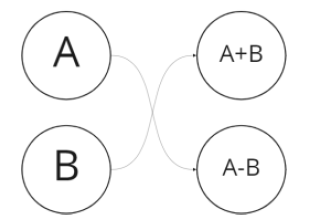  
*Рисунок 6 - "Бабочка" Уолша-Адамара*  

Пример расчета БПУА для примера из рисунка 3 приведен на рисунке 7.  
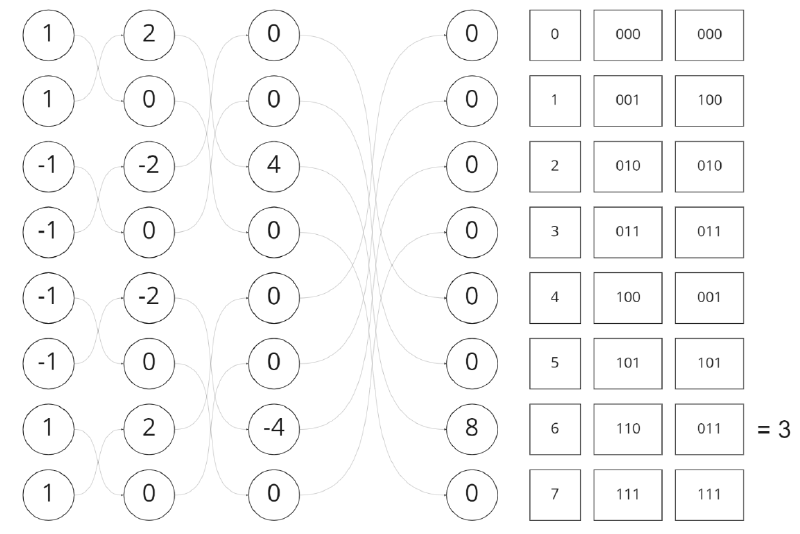  
*Рисунок 7 - Пример декодирования данных при помощи БПУА для кодов Уолша-Адамара длиной 8*  

## 2. Основное задание  <a id="ch_2"></a>
### 2.1 Общие указания к выполнению лабораторной работы  <a id="ch_2_1"></a>
Лабораторная работа должна быть выполнена на языке Python. Результатом работы должен быть скрипт, в котором реализованы все необходимые задания и функции.  
Для вывода промежуточных графиков рекомендуется использовать возможности библиотеки **matplotlib** [[8][s8]].  
Для получения зачета по лабораторной работе необходимо, как минимум, выполнить все пункты основного задания. Исходные данные определены в таблицах 1 и 2. Для того, чтобы получить максимальный балл за работу, необходимо выполнить дополнительные задания в зависимости от варианта (раздел 3).  
При сдаче (защите) лабораторной работы необходимо быть готовым ответить на любой из контрольных вопросов к лабораторной работе, либо на вопросы по лекционному материалу на соотвутствующую тему.  

### 2.2 Синтез и фильтрация М-последовательностей  <a id="ch_2_2"></a>
1) Сформировать две М-последовательности $M_{1}$ и $M_{2}$ в соответствии с исходными данными из таблицы 1.  
Для генерации M-последовательностей мы будем использовать функцию **max_len_seq** из пакета **scipy.signal** [[3][s3]]. Параметр *state* используется для инициализации *фазы* M-последовательности, а параметр *taps* - для задания коэффициентов многочлена. Формат параметра *taps* - это список степеней слагаемых многочлена $G(X)$, при которых коэффициент $g_{i}$ равен 1. При этом, степень при коэффициентах ($g_{m}$) и ($g_{0}$) указывать в данном списке не нужно (так как они всегда принимают значение 1).  

*Пример*.  
Пусть задан характеристический многочлен М-последовательности в виде списка:  
С = [1,1,0,0,1]. 
Соответствующая конфигурация автомата изображена на рисунке 8.  
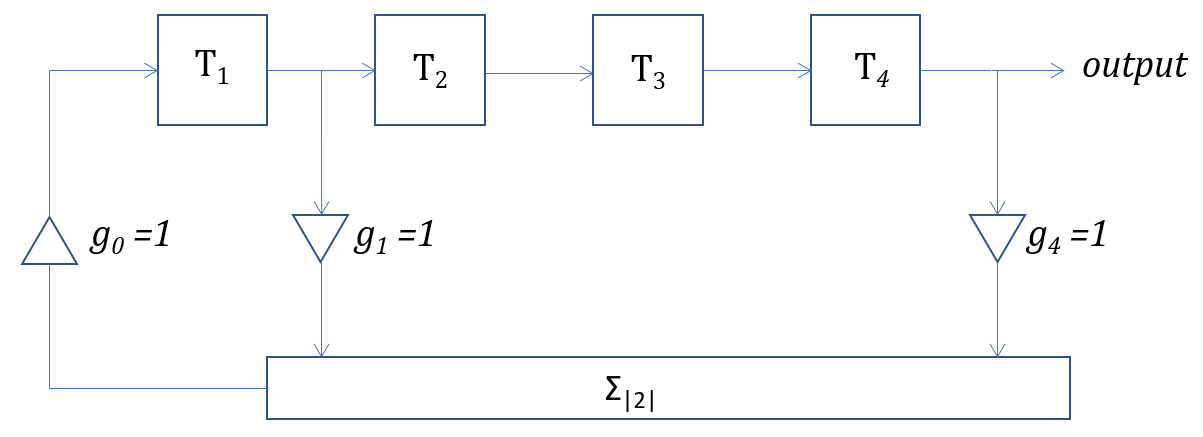  
*Рисунок 8 - Пример автомата генерации М-последовательности*  
Полиномиальное представление: $G(X) = 1+X+X^{4}$. Параметр taps=[1].  

2) Сформировать сумму M-последовательностей $M_{sum}=M_{1}+M_{2}$, $M_{2}$ взять со сдвигом и инверсией. Сдвиг выбрать равным 100 плюс ваш номер по списку в группе, умноженный на 10, но не более половины длины последовательностей $M_{1}$ и $M_{2}$. Изобразить полученные результаты на графиках.

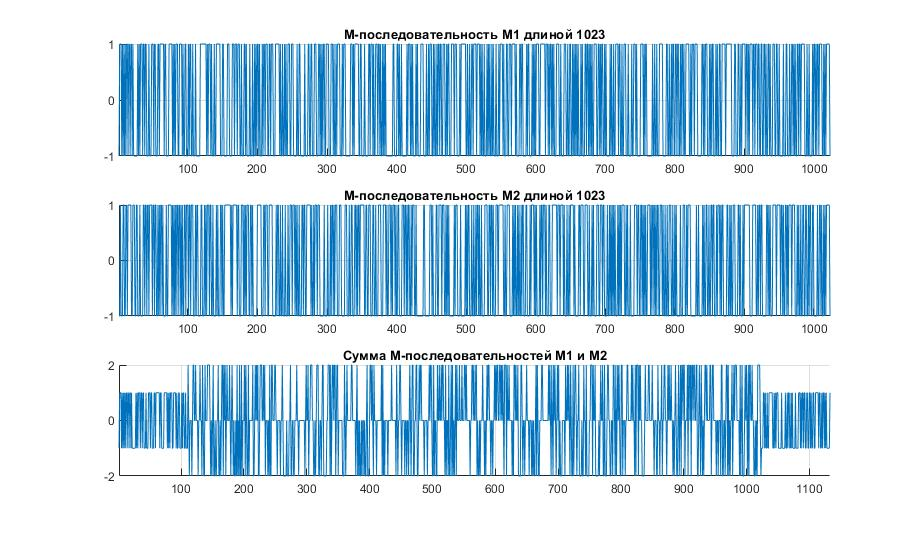  
*Рисунок 9 - Пример построения М-последовательностей и их суммы*  

3) Построить АКФ для $M_{1}$ (где $M_{1}$ является и сигналом, и опорной функцией) при помощи функции **numpy.correlate** [[9][s9]]. Изобразить полученный результат на графике.
4) Построить ВКФ ($M_{1}$ - сигнал, $M_{2}$ - опорная функция). Изобразить полученный результат на графике.
5) Из $M_{sum}$ отфильтровать $M_{1}$ ($M_{sum}$ - сигнал, $M_{1}$ - опорная функция). Изобразить полученный результат на графике.
6) Из $M_{sum}$ отфильтровать $M_{2}$ ($M_{sum}$ - сигнал, $M_{2}$ - опорная функция). Изобразить полученный результат на графике.

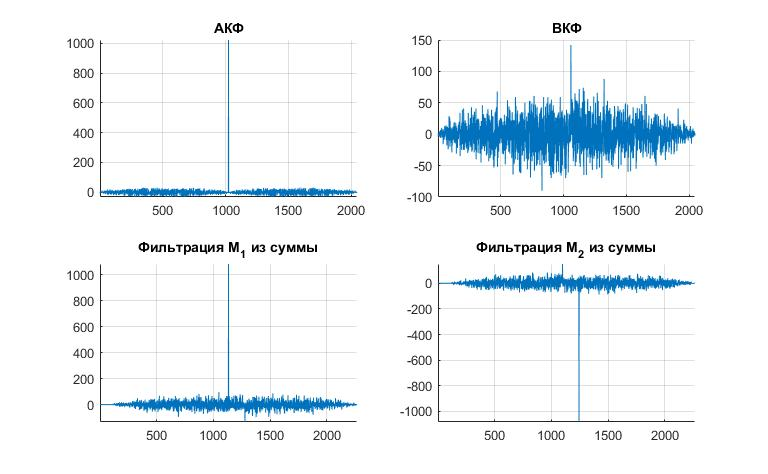  
*Рисунок 10 - Пример построения корреляционных функций*  

7) Сформировать последовательность $M_{3}$, добавив к $M_{1}$ шум.

Для формирования шума можно воспользоваться простым генератором **numpy.random.default_rng** [[10][s10]]. Обратите внимание, что область значений шума должна быть $[-A_{noise}, ... , A_{noise}]$, где $A_{noise}$ - амплитуда шума. На рисунке 11 представлен пример кривой шума для сигнала размером 1000 отсчетов и $A_{noise} = 2$.  
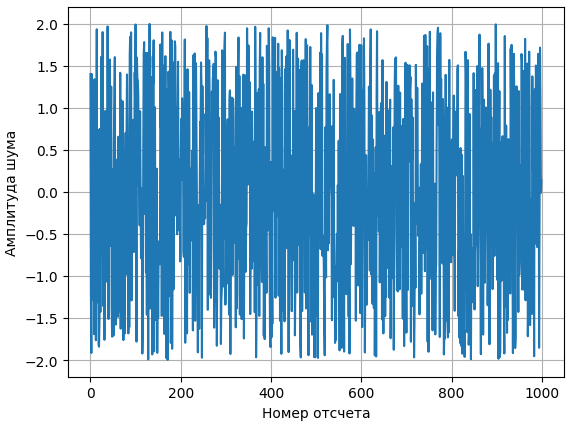
*Рисунок 11 - Пример генерации шума амплитудой $A_{noise}=2$*  

8) Из $M_{3}$ отфильтровать $M_{1}$ ($M_{3}$ - сигнал, $M_{1}$ - опорная функция). Изобразить полученный результат на графике.
9) Изобразить зависимость, полученную в п.8, в логарифмических единицах (dB) и проанализировать полученные результаты. Для этого необходимо воспользоваться формулой:
$$
A_{db} = 20 \times log_{10}\left(|\frac{A}{A_{max}}|\right). 
$$  
10) Найти максимальную амплитуду шума, при которой главный пик превышает боковые в 2 раза, или на графике в логарифмическом масштабе - на 6 дБ.  

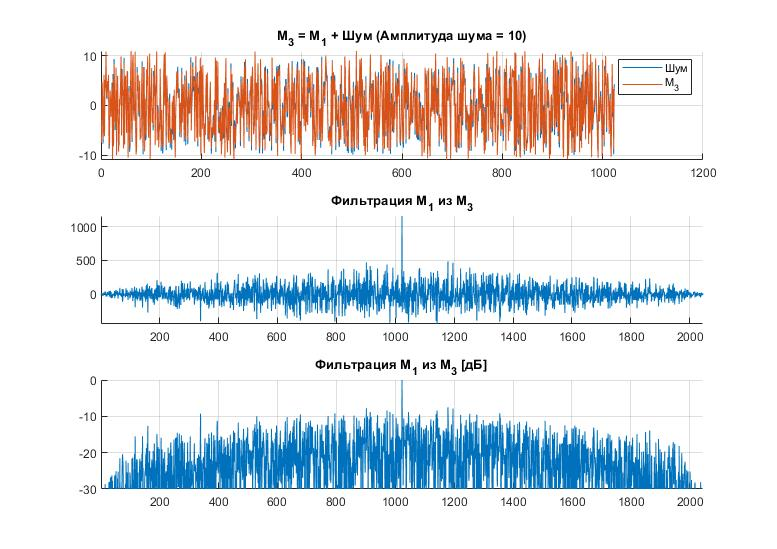  
*Рисунок 12 - Пример результатов исследования М-последовательности на шумоподавление*  

### 2.3 Синтез и фильтрация кодов Уолша-Адамара  <a id="ch_2_3"></a>
1) Сформировать два кода $W_{1}$ и $W_{2}$ при помощи матрицы Адамара. Для этого можно воспользоваться функцией **scipy.linalg.hadamard** [[11][s11]]. Кодируемые данные (data) и разрядность данных (r) необходимо взять из таблицы 2 согласно варианту.
2) Сформировать сумму кодов $W_{sum} = W_{1} + W_{2}$.
3) Вычислить БПУА для суммы кодов $W_{sum}$ при помощи функции **sympy.discrete.transforms.fwht** [[12][s12]]. Изобразить полученный результат на графике. Убедиться в том, что результат БПУА соответствует исходным закодированным данным.

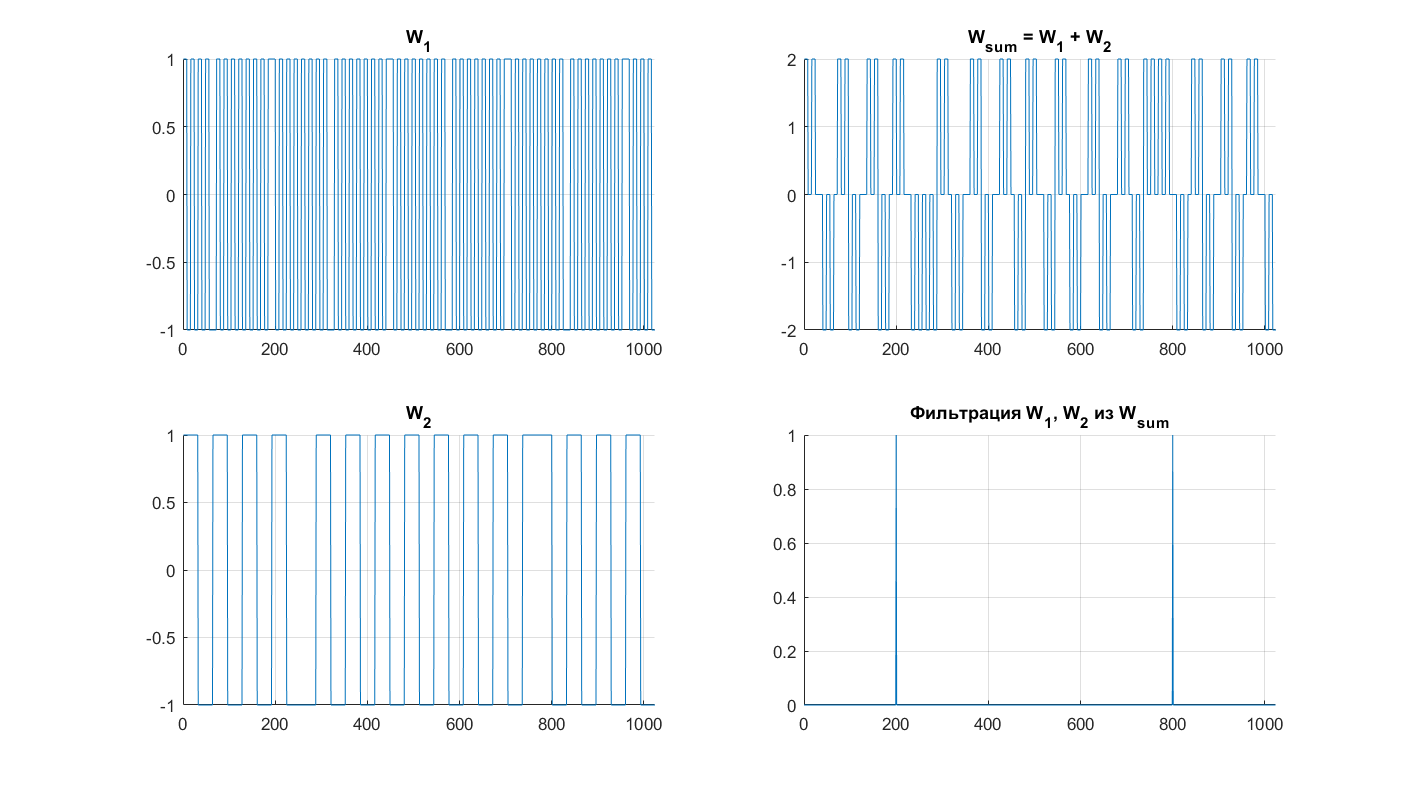  
*Рисунок 13 - Пример построения кодов Уолша-Адамара (data1=200, data2=800, r=10) и результата БПУА*  

4) Исследовать коды Уолша-Адамара на шумоподавление (аналогично этапам 7-9 из задания 2.2). Сформировать $W_{3}=W_{sum}+NOISE$.
5) Вычислить БПУА для $W_{3}$. Изобразить полученный результат на графике. Удостовериться в том, что полученный результат соответствует исходным закодированным числам.
6) Найти максимальную амплитуду шума, при которой главный пик превышает боковые в 2 раза, или на графике в логарифмическом масштабе - на 6 дБ.  

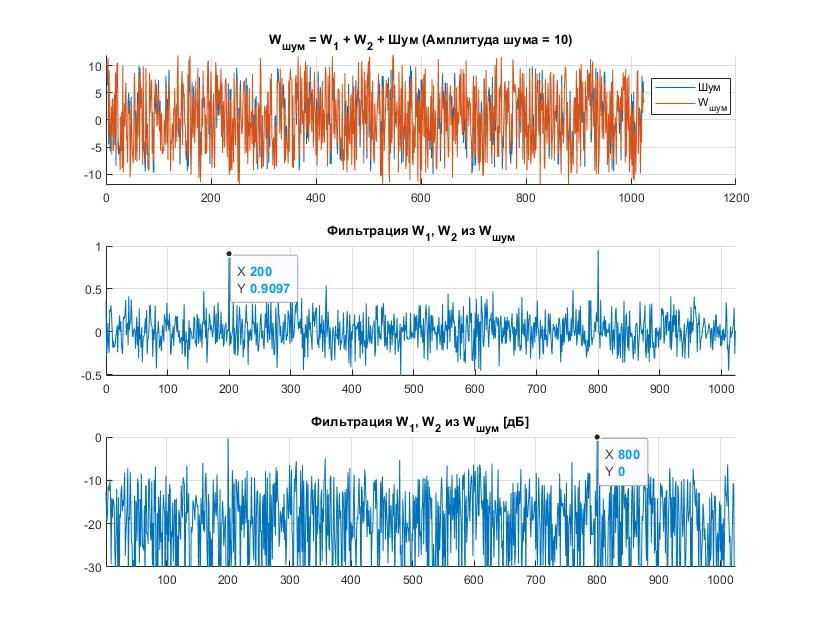  
*Рисунок 14 - Пример результатов исследования кодов Уолша-Адамара на шумоподавление*  

### 2.4 Варианты заданий  <a id="ch_2_4"></a>

<table>
<tr><th><em>Таблица 1 - Исходные данные для формирования М-последовательностей</em></th><th><em>Таблица 2 - исходные данные для формирования кодов Уолша-Адамара</em></th></tr>
<tr><td>

|Номер по списку | А (фаза) | С1 (хар. многочлен) | С2 (хар. многочлен) |
|---|---|---|---|
|1  | 1000000001 | 10000001001 | 10000011011 |
|2  | 1000000010 | 10000100111 | 10000101101 |
|3  | 1000000011 | 10001100101 | 10001101111 |
|4  | 1000000100 | 10010000001 | 10010001011 |
|5  | 1000000101 | 10011000101 | 10011010111 |
|6  | 1000000110 | 10011100111 | 10011110011 |
|7  | 1000000111 | 10011111111 | 10100001101 |
|8  | 1000001000 | 10100011001 | 10100100011 |
|9  | 1000001001 | 10100110001 | 10100111101 |
|10 | 1000001010 | 10101000011 | 10101010111 |
|11 | 1000001011 | 10101101011 | 10110000101 |
|12 | 1000001100 | 10110001111 | 10110010111 |
|13 | 1000001101 | 10110100001 | 10111000111 |
|14 | 1000001110 | 10111100101 | 10111110111 |
|15 | 1000001111 | 10111111011 | 11000010011 |
|16 | 1000010000 | 11000010101 | 11000100101 |
|17 | 1000010001 | 11000110111 | 11001000011 |
|18 | 1000010010 | 11001001111 | 11001011011 |
|19 | 1000010011 | 11001111001 | 11001111111 |
|20 | 1000010100 | 11010001001 | 11010110101 |
|21 | 1000010101 | 11011000001 | 11011010011 |
|22 | 1000010110 | 11011011111 | 11011111101 |
|23 | 1000010111 | 11100010111 | 11100011101 |
|24 | 1000011000 | 11100100001 | 11100111001 |
|25 | 1000011001 | 11101000111 | 11101010101 |
|26 | 1000011010 | 11101010101 | 11101001101 |
|27 | 1000011011 | 11101100011 | 11101111101 |
|28 | 1000011100 | 11110001101 | 11110010011 |
|29 | 1000011101 | 11110110001 | 11111011011 |
|30 | 1000011110 | 11111110011 | 11111111001 |

</td><td>

|Номер по списку | data1 | data2 | r |
|---|---|---|---|
| 1 |  1 | 434 | 10 |
| 2 |  2 | 149 | 10 |
| 3 |  3 | 121 | 10 |
| 4 |  4 | 354 | 10 |
| 5 |  5 | 254 | 10 |
| 6 |  6 | 356 | 10 |
| 7 |  7 | 228 | 10 |
| 8 |  8 | 674 | 10 |
| 9 |  9 | 359 | 10 |
|10 | 10 | 458 | 10 |
|11 | 11 | 596 | 10 |
|12 | 12 | 239 | 10 |
|13 | 13 | 489 | 10 |
|14 | 14 | 378 | 10 |
|15 | 15 | 586 | 10 |
|16 | 16 | 536 | 10 |
|17 | 17 | 385 | 10 |
|18 | 18 | 378 | 10 |
|19 | 19 | 536 | 10 |
|20 | 20 | 397 | 10 |
|21 | 21 | 369 | 10 |
|22 | 22 | 252 | 10 |
|23 | 23 | 137 | 10 |
|24 | 24 | 35  | 10 |
|25 | 25 | 378 | 10 |
|26 | 26 | 453 | 10 |
|27 | 27 | 377 | 10 |
|28 | 28 | 357 | 10 |
|29 | 29 | 373 | 10 |
|30 | 30 | 222 | 10 |

</td></tr> </table>

## 3. Дополнительные задания  <a id="ch_3"></a>

1. Написать функцию, реализующую цифровой автомат генерации М-последовательности (соответствующий рисунку 1). Проделать этап 1 из задания 2.2 при помощи новой функции, проанализировать полученные результаты.
2. Написать функцию, реализующую согласованный фильтр (соответствующий рисунку 2). Проделать этапы 2 и 3 из задания 2.2 при помощи новой функции, проанализировать полученные результаты.
3. Написать функцию, реализующую цифровой автомат генерации кодов Уолша-Адамара (соответствующий рисунку 4). Проделать этап 1 из задания 2.3 при помощи новой функции, проанализировать полученные результаты.
4. Написать функцию, реализующую алгоритм БПУА. Проделать этап 3 из задания 2.3 при помощи новой функции, проанализировать полученные результаты. 

## 4. Контрольные вопросы  <a id="ch_4"></a>

1. Что такое шумоподобный сигнал?
2. Что такое M-последовательность?
3. Какие вы знаете свойства M-последовательности?
4. Сколько бит цифровой информации можно закодировать одной M-последовательностью?
5. Что такое АКФ и ВКФ?
6. Чем отличается реализация АКФ от ВКФ?
7. Что такое опорная функция?
8. Что такое коды Уошла-Адамара?
9. Перечислите свойства кодов Уолша-Адамара?
10. Сколько бит цифровой информации можно закодировать коом Уолша-Адамара?
11. Что используют для фильтрации кодов Уолша-Адамара? Для M-последовательности?
12. Как получить из результата преобразорвания Уолша-Адамара искомуюзакодированную информацию?
13. Какой из рассмотренных в работе методов кодирования информации обладает большей устойчивостью шумоподавлению?

[s1]: https://en.wikipedia.org/wiki/Maximum_length_sequence   
[s2]: https://web.archive.org/web/20181001062252/http://www.newwaveinstruments.com/resources/articles/m_sequence_linear_feedback_shift_register_lfsr.htm  
[s3]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.max_len_seq.html
[s4]: https://en.wikipedia.org/wiki/Kronecker_delta  
[s5]: https://ru.wikipedia.org/wiki/Согласованный_фильтр
[s6]: https://ru.wikipedia.org/wiki/Функция_Уолша
[s7]: https://docs.exponenta.ru/signal/ref/fwht.html
[s8]: https://matplotlib.org/stable/users/getting_started/
[s9]: https://numpy.org/doc/stable/reference/generated/numpy.correlate.html
[s10]: https://numpy.org/doc/stable/reference/random/generator.html#random-generator
[s11]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.hadamard.html
[s12]: https://docs.sympy.org/latest/modules/discrete.html#fast-walsh-hadamard-transform  